# Early stopping

It is a regularization technique used in deep learning to prevent overfitting by monitoring the performance of the model on a validation dataset during training and stopping training when the performance starts to degrade. 


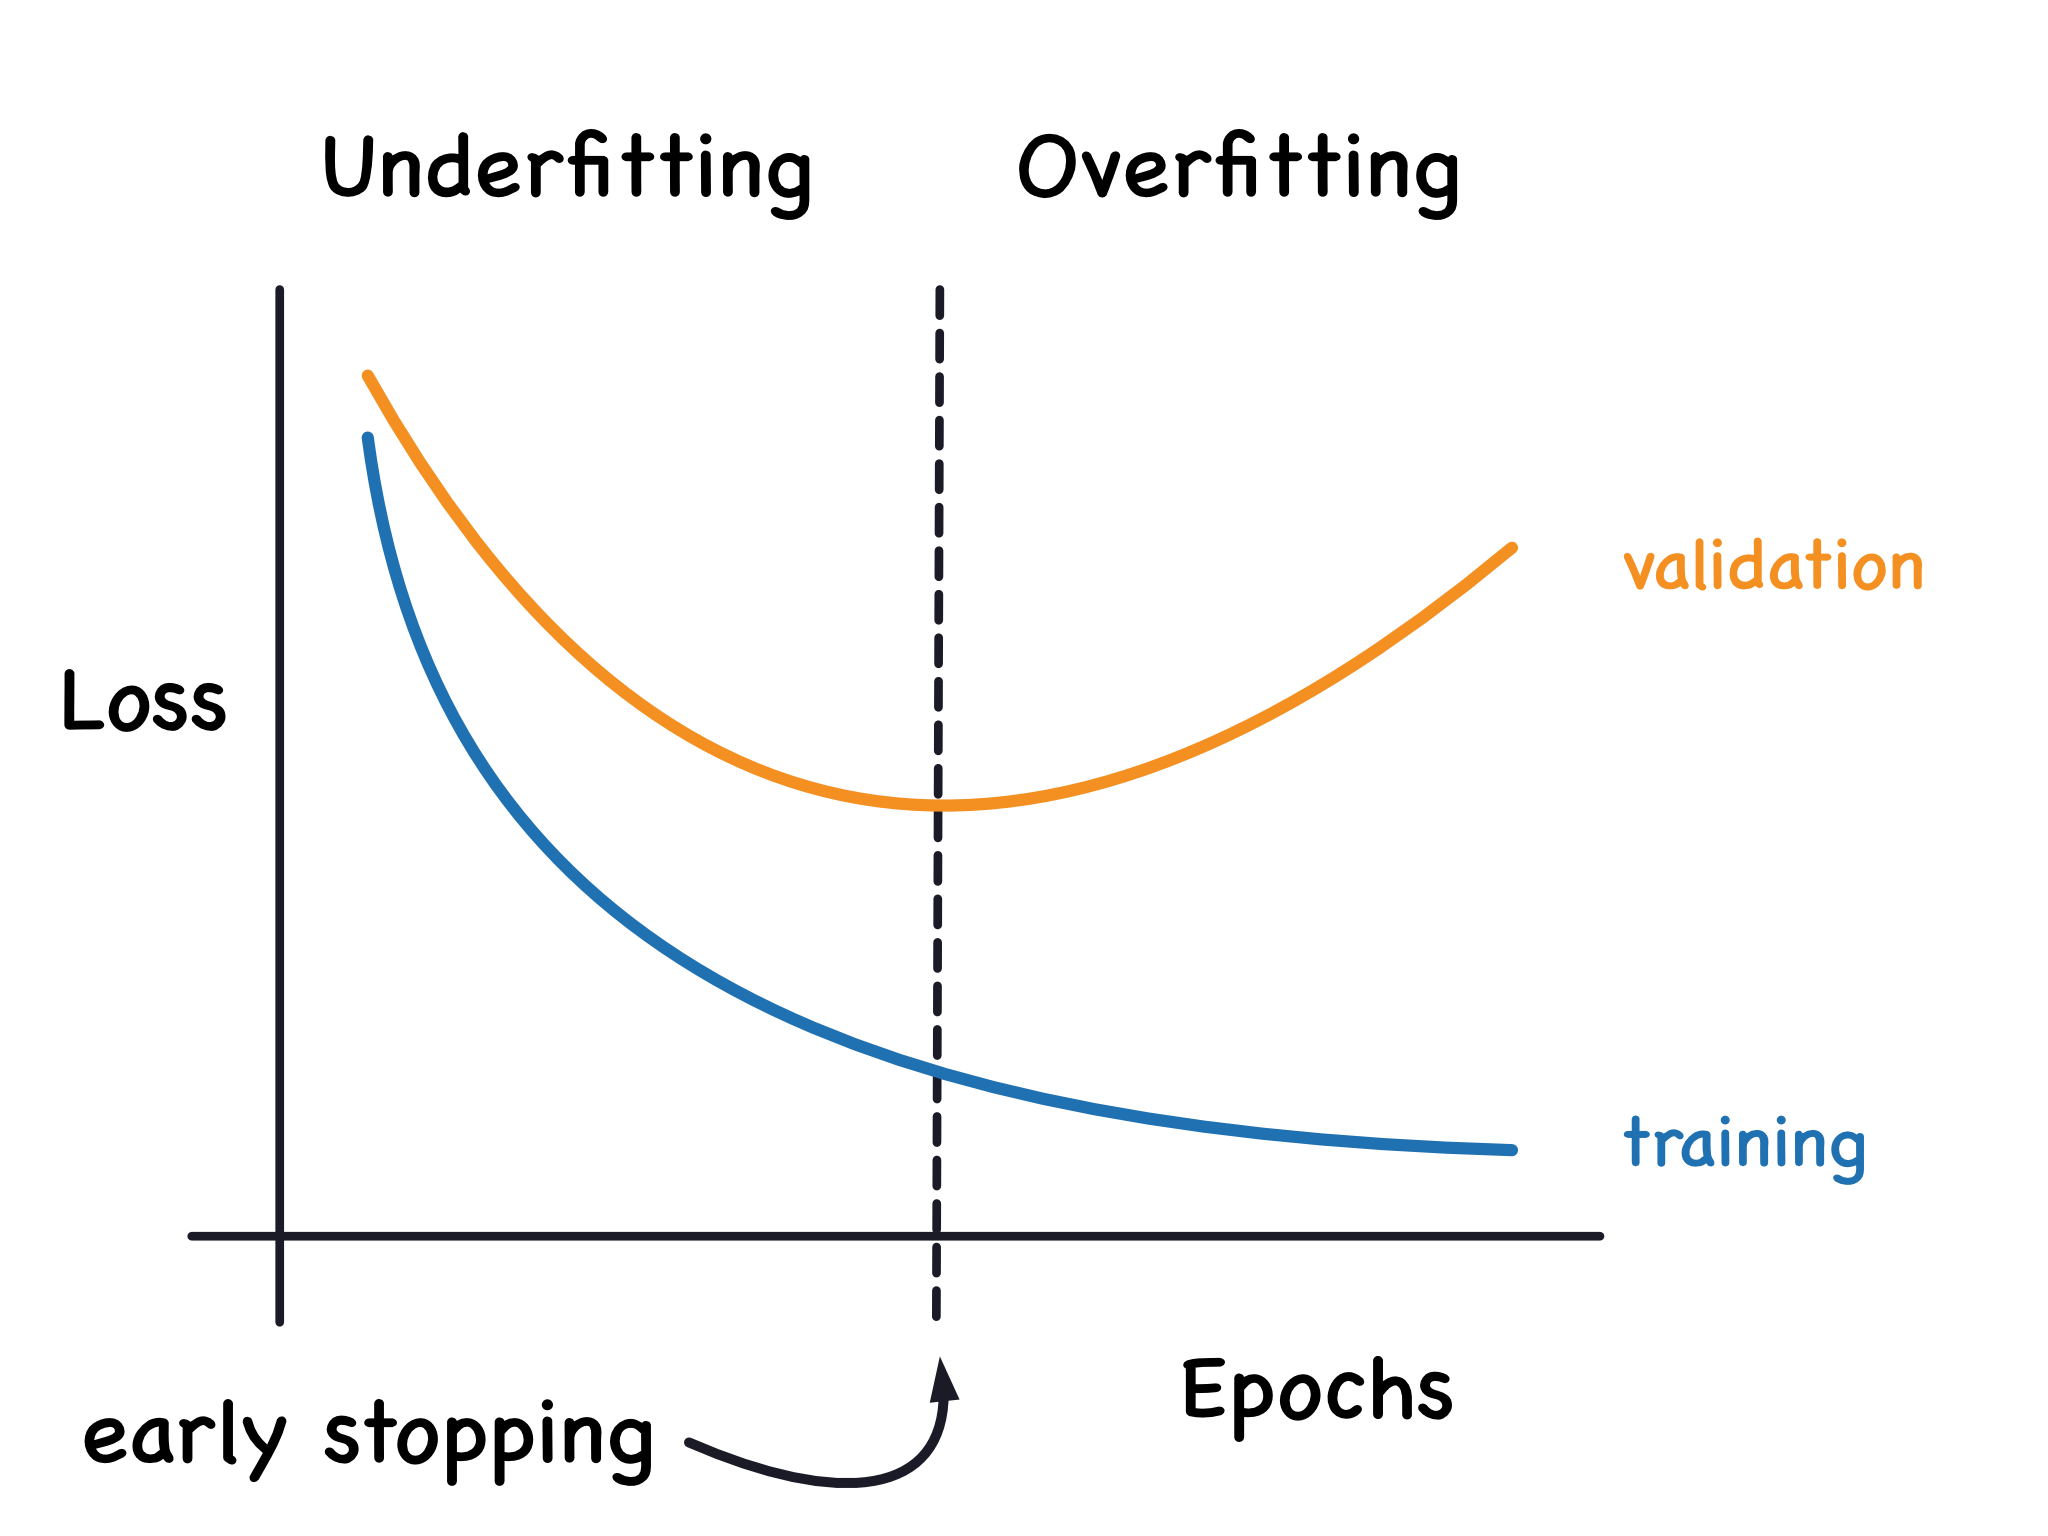

This helps prevent the model from learning noise in the training data and improves its ability to generalize to unseen data.


### How early stopping works in deep learning?


* **Train-Validation Split**: The dataset is typically split into training and validation sets. The training set is used to train the model, while the validation set is used to monitor the model's performance during training.

* **Monitor Validation Loss**: During training, the model's performance on the validation set is monitored by evaluating a loss metric (e.g., cross-entropy loss, mean squared error) or other evaluation metrics (e.g., accuracy, F1 score). The validation loss is calculated after each training epoch or after a certain number of training batches.

* **Early Stopping Criteria**: A patience parameter is defined, which specifies the number of epochs to wait before stopping training if there is no improvement in the validation loss. If the validation loss does not decrease for a certain number of epochs (defined by the patience parameter), training is stopped early.

* **Model Checkpointing**: Optionally, the model weights can be saved periodically during training (e.g., after each epoch) to capture the best model performance on the validation set. This allows you to retrieve the model with the best validation performance even if training is stopped early.

* **Stopping Training**: When the validation loss does not improve for a specified number of epochs (defined by the patience parameter), training is stopped early, and the model with the lowest validation loss is retained.

Let's implement it practically. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import warnings

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

2024-04-18 13:10:04.182126: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 13:10:04.182226: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 13:10:04.184091: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
inputs, target = make_circles(n_samples = 500, noise = 0.1, random_state = 42)

<Axes: >

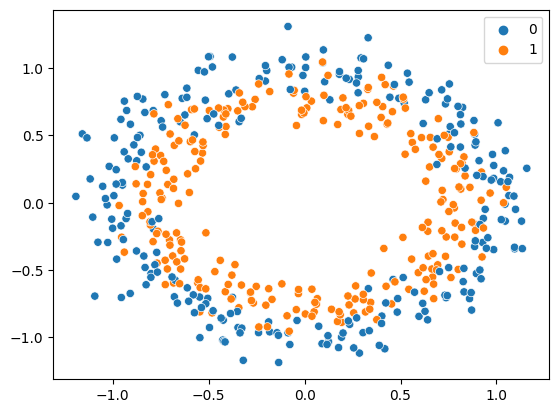

In [4]:
sns.scatterplot(x = inputs[:,0], y= inputs[:,1], hue = target)

In [5]:
train_input, test_input, train_target, test_target = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [6]:
model = Sequential()

model.add(Dense(256, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [9]:
history = model.fit(train_input, train_target, validation_split = 0.2, epochs = 1000, verbose = 0)

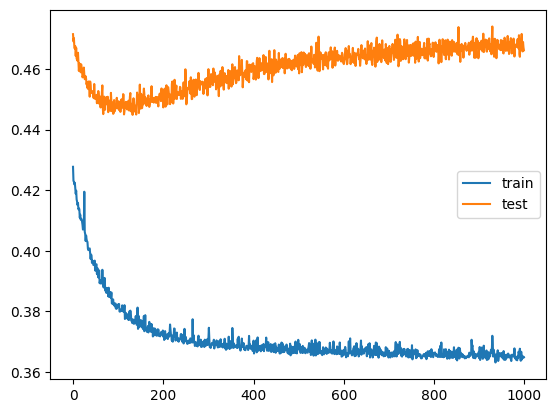

In [10]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()
plt.show()

In [11]:
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


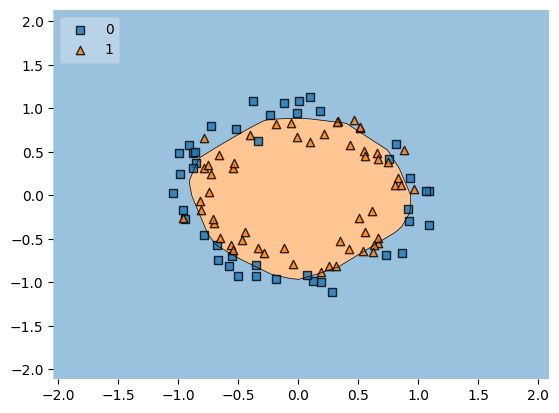

In [12]:
plot_decision_regions(test_input, test_target.ravel(), clf = model, legend=2)
plt.show()

## Early Stopping

Stop training when a monitored metric has stopped improving.

In practice, early stopping is implemented using callbacks in deep learning frameworks such as TensorFlow and Keras. These callbacks monitor the validation loss during training and stop training when the specified criteria are met.

### EarlyStopping class

        keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=0,
            patience=0,
            verbose=0,
            mode="auto",
            baseline=None,
            restore_best_weights=False,
            start_from_epoch=0,
        )


**Arguments:** 

* **monitor**: Quantity to be monitored. Defaults to "val_loss".
* **min_delta**: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. Defaults to 0.
* **patience**: Number of epochs with no improvement after which training will be stopped. Defaults to 0.
* **verbose**: Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action. Defaults to 0.
* **mode**: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity. Defaults to "auto".
* **baseline**: Baseline value for the monitored quantity. If not None, training will stop if the model doesn't show improvement over the baseline. Defaults to None.
* **restore_best_weights**: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set. Defaults to False.
* **start_from_epoch**: Number of epochs to wait before starting to monitor improvement. This allows for a warm-up period in which no improvement is expected and thus training will not be stopped. Defaults to 0.

In [13]:
model = Sequential()

model.add(Dense(256, input_dim = 2, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [14]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [15]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights=False
)

In [18]:
history = model.fit(train_input, train_target, validation_split = 0.2, epochs = 1000, verbose = 0, callbacks=callback)

Epoch 32: early stopping


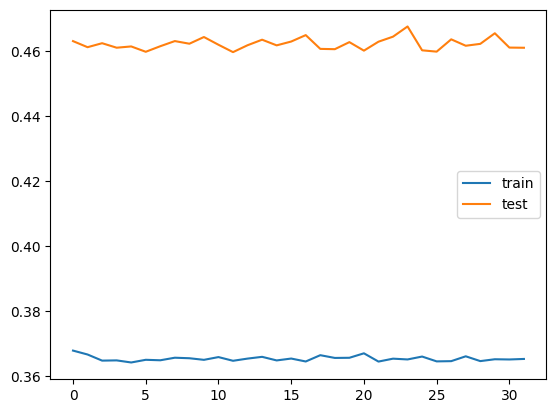

In [19]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


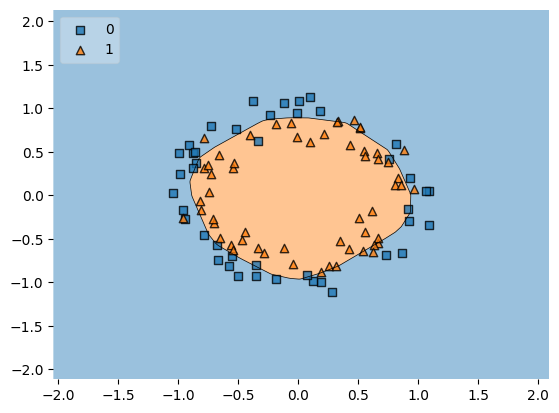

In [20]:
plot_decision_regions(test_input, test_target.ravel(), clf = model, legend=2)
plt.show()

#### Same Accuracy with less no. of epochs. 

In conclusion, Early stopping helps prevent overfitting by terminating training when the model's performance on the validation set starts to degrade. It allows the model to generalize better to unseen data by avoiding excessive fitting to the training data.

> Stay tuned for more and Don't forget to **Star** this Github Repository for more such contents.
